In [3]:
import pandas as pd
import numpy as np

%matplotlib inline

In [17]:
attacks = pd.read_excel('../assets/GSAF5.xls')

In [18]:
len(attacks)

25687

In [19]:
attacks.to_csv('../assets/shark-attack-data.csv')

In [20]:
attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

#### Remove columns with all NaN values

In [21]:
attacks.drop(['Unnamed: 22', 'Unnamed: 23', 'original order', 'Case Number.2', 'Case Number.1'], axis =1, inplace = True)

#### There is a series of all NAN values at the bottom of this df; likely because we read in an excel file

In [22]:
attacks[attacks['Case Number'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17021 entries, 5415 to 25685
Data columns (total 19 columns):
Case Number               0 non-null object
Date                      1 non-null object
Year                      1 non-null float64
Type                      1 non-null object
Country                   1 non-null object
Area                      1 non-null object
Location                  1 non-null object
Activity                  1 non-null object
Name                      1 non-null object
Sex                       1 non-null object
Age                       0 non-null object
Injury                    1 non-null object
Fatal (Y/N)               1 non-null object
Time                      0 non-null object
Species                   0 non-null object
Investigator or Source    1 non-null object
pdf                       1 non-null object
href formula              1 non-null object
href                      1 non-null object
dtypes: float64(1), object(18)
memory usage: 2.6+ M

In [23]:
#we are safe to remove all NaN 'Case Number'; the only one where there isn't null in all fields occured in 1905

In [24]:
attacks.dropna(subset=['Case Number'], how='all', inplace = True)

In [25]:
# we can also drop any record where 'Case Number' == 0; artifact of excel blank cells?

In [26]:
attacks = attacks[attacks['Case Number']!=0]

#### Now to hone our data down to the last 10 years. 2007 - 2017

In [27]:
attacks['Date'] = attacks['Date'].astype(str)

In [28]:
attacks.dropna(subset = ['Date'], inplace = True)

In [29]:
new_df = attacks[attacks['Date'].str.contains('2017')]

In [30]:
for i in ['2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007']:   
    new_df = new_df.append(attacks[attacks['Date'].str.contains(i)])

In [31]:
new_df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href
0,2017.11.30.b,30-Nov-2017,2017.0,Unprovoked,COSTA RICA,Cocos Island,Manuelita,Scuba Diving,__ Jimenez,M,26,Serious injury to leg,N,NaN,"Tiger shark, female",R. Arauz,2017.11.30.b-Jimenez.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2017.11.30.a,30-Nov-2017,2017.0,Unprovoked,COSTA RICA,Cocos Island,Manuelita,Scuba diving,Rohina Bhandari,F,49,FATAL,Y,NaN,"Tiger shark, female",R. Arauz,2017.11.30.a-Bhandari.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2017.11.25.R,Reported 25-Nov-2017,2017.0,Sea Disaster,LIBYA,NaN,Gars Garabulli,2 boats capsized,31 migrants,NaN,NaN,FATAL,Y,NaN,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2017.11.24,24-Nov-2017,2017.0,Unprovoked,USA,California,"Stillwater Cove, Monterey County",Spearfishing,Grigor Azatian,M,25,Right leg bitten,N,13h45,"White shark, 4.6 m","R. Collier, GSAF",2017.11.24-Azatian.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2017.11.18,18-Nov-2017,2017.0,Unprovoked,USA,Florida,"Floridana Beach, Brevard County",Surfing,Kaia Anderson,F,14,Heel bitten,N,Late afternoon,NaN,"Florida Today, 11/21/2017",2017.11.18-Anderson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
5,2017.11.13.R,Reported 13-Nov-2017,2017.0,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,NaN,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
6,2017.11.13,13-Nov-2017,2017.0,Unprovoked,AUSTRALIA,New South Wales,Avoca Beach,Surfing,Charlie Fry,M,25,Puncture wounds to left shoulder,N,16h00,2 m shark,"B. Myatt, GSAF",2017.11.13-Fry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
7,2017.11.04,04-Nov-2017,2017.0,Unprovoked,CUBA,Holquin Province,Guardalavaca Beach,Night bathing,Jesús Cabrera González,M,22,FATAL,Y,23h30,Tiger shark,TrackingSharks.com,2017.11.04-Cuba.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
8,2017.10.31.R,Reported 31-Oct-2017,2017.0,Unprovoked,AUSTRALIA,Queensland,Magnetic Island,Snorkeling,Jack Tolley,M,7,Calf injured,N,NaN,Cookiecutter shark,"Townsville Bulletin, 10/31/2017",2017.10.21.R-Tolley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
9,2017.10.28,28-Oct-2017,2017.0,Unprovoked,AUSTRALIA,New South Wales,Birubi Point,Surfing,male,M,31,Minor injury to foot,N,09h00,"Wobbegong shark, 1 m","B. Myatt, GSAF",2017.10.28-Birubi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


#### Now to format our dates as datetime items.

In [32]:
new_df['ts_year'] = new_df.apply(lambda x: x['Case Number'].split('.', 1)[0], axis =1) 
# this reveals some ND values, which have very sparse data, we can remove.

In [33]:
new_df = new_df[~new_df['Case Number'].str.contains('ND')]

In [34]:
new_df['ts_month'] = new_df.apply(lambda x: str(x['Case Number'].split('.',2)[1])[0:2], axis =1)

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
new_df['ts_month'].unique()
#we have a month '00' - this is fine enough for our annual EDAs. Can fix later.

array(['11', '10', '09', '08', '07', '06', '05', '04', '03', '02', '01',
       '12', '00'], dtype=object)

In [36]:
ts_day = []
for i in new_df['Case Number']:
    try:
        ts_day.append(i.split('.',3)[2])
    except:
        try:
            ts_day.append(i.split('.',2)[2][0:2])
        except:
            ts_day.append('01')

In [37]:
new_df['ts_day'] = ts_day

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
pd.to_datetime(str(new_df['ts_month'][0]+"/"+new_df['ts_day'][0]+"/"+new_df['ts_year'][0]), format = '%m/%d/%Y')

Timestamp('2017-11-30 00:00:00')

In [39]:
ts_time = []
for i in range(0, len(new_df)):
    try:
        ts_time.append(str(new_df['Time'][i]).split('h',1)[0] + ":" + str(new_df['Time'][i]).split('h',1)[1][0:2])
    except:
        ts_time.append(None)

In [40]:
new_df['ts_time'] = ts_time

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [41]:
ts_date = []
for i in range(0, len(new_df)):
    try:
        ts_date.append(pd.to_datetime(str(new_df['ts_month'][i]+"/"+new_df['ts_day'][i]+"/"+new_df['ts_year'][i]), 
                                      format = '%m/%d/%Y'))
    except:
        ts_date.append(np.nan)

In [42]:
len(ts_date)

1342

In [43]:
new_df['ts_date'] = ts_date

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
new_df.drop(['Case Number', 'Date', 'Year'], axis =1)

,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),...,Species,Investigator or Source,pdf,href formula,href,ts_year,ts_month,ts_day,ts_time,ts_date
0,Unprovoked,COSTA RICA,Cocos Island,Manuelita,Scuba Diving,__ Jimenez,M,26,Serious injury to leg,N,...,"Tiger shark, female",R. Arauz,2017.11.30.b-Jimenez.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017,11,30,None,2017-11-30
1,Unprovoked,COSTA RICA,Cocos Island,Manuelita,Scuba diving,Rohina Bhandari,F,49,FATAL,Y,...,"Tiger shark, female",R. Arauz,2017.11.30.a-Bhandari.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017,11,30,None,2017-11-30
2,Sea Disaster,LIBYA,NaN,Gars Garabulli,2 boats capsized,31 migrants,NaN,NaN,FATAL,Y,...,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017,11,25,None,2017-11-25
3,Unprovoked,USA,California,"Stillwater Cove, Monterey County",Spearfishing,Grigor Azatian,M,25,Right leg bitten,N,...,"White shark, 4.6 m","R. Collier, GSAF",2017.11.24-Azatian.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017,11,24,13:45,2017-11-24
4,Unprovoked,USA,Florida,"Floridana Beach, Brevard County",Surfing,Kaia Anderson,F,14,Heel bitten,N,...,NaN,"Florida Today, 11/21/2017",2017.11.18-Anderson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017,11,18,None,2017-11-18
5,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,...,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017,11,13,None,2017-11-13
6,Unprovoked,AUSTRALIA,New South Wales,Avoca Beach,Surfing,Charlie Fry,M,25,Puncture wounds to left shoulder,N,...,2 m shark,"B. Myatt, GSAF",2017.11.13-Fry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017,11,13,16:00,2017-11-13
7,Unprovoked,CUBA,Holquin Province,Guardalavaca Beach,Night bathing,Jesús Cabrera González,M,22,FATAL,Y,...,Tiger shark,TrackingSharks.com,2017.11.04-Cuba.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017,11,04,23:30,2017-11-04
8,Unprovoked,AUSTRALIA,Queensland,Magnetic Island,Snorkeling,Jack Tolley,M,7,Calf injured,N,...,Cookiecutter shark,"Townsville Bulletin, 10/31/2017",2017.10.21.R-Tolley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017,10,31,None,2017-10-31
9,Unprovoked,AUSTRALIA,New South Wales,Birubi Point,Surfing,male,M,31,Minor injury to foot,N,...,"Wobbegong shark, 1 m","B. Myatt, GSAF",2017.10.28-Birubi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017,10,28,09:00,2017-10-28


#### Woo let's start some EDA.

In [45]:
new_df['Type'].value_counts()

Unprovoked      1037
Provoked         111
Invalid          109
Boating           59
Boat              13
Sea Disaster      10
Boatomg            1
Name: Type, dtype: int64

In [46]:
new_df.loc[new_df['Type'] == 'Boatomg', 'Type'] = 'Boating'

/Users/nmolivo/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [47]:
new_df.to_csv('../assets/01_df.csv')

In [125]:
new_df = pd.read_csv('../assets/01_df.csv')

In [126]:
insta = new_df[new_df['Type']=='Invalid']

In [127]:
insta['Activity'].value_counts() #probably could group into 
#[Diving], [Swimming (leisure or sport)], [Swimming(capsized boat)], [Surfing, SUP], 
#[Fishing or Hunting], [Floating, Wading, Crawling, Standing, Treading water, playing], Migrating

Swimming                                              29
Surfing                                               22
Scuba diving                                           3
Scuba Diving                                           3
Wading                                                 3
Spearfishing                                           3
Cage Diving                                            2
Fishing                                                2
Shark diving                                           2
Fishing                                                2
Diving                                                 2
Body surfing                                           1
Floating                                               1
Surf skiing                                            1
Dragging stranded shark into deeper water              1
Feeding stingrays?                                     1
Diving for lobsters                                    1
Free-diving                    

In [128]:
list(insta[insta['Activity']=="Photo shoot"]['href formula'])

['http://sharkattackfile.net/spreadsheets/pdf_directory/2017.05.26-Cavelli.pdf']

In [129]:
new_df['Fatal (Y/N)'] = new_df['Fatal (Y/N)'].astype(str)

In [130]:
new_df[new_df['Fatal (Y/N)'].str.contains("F")]

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Species,Investigator or Source,pdf,href formula,href,ts_year,ts_month,ts_day,ts_time,ts_date
63,63,2017.07.02,02-Jul-2017,2017.0,Invalid,COMOROS,Anjouan,Moya,Fishing,NaN,...,Shark involvement prior to death not confirmed,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017,7,2,NaN,2017-07-02


In [131]:
new_df.iloc[1296]

Unnamed: 0                                                             1297
Case Number                                                      2007.07.00
Date                                                               Jul-2007
Year                                                                   2007
Type                                                                Invalid
Country                                                             SENEGAL
Area                                                                    NaN
Location                                                                NaN
Activity                                                             Murder
Name                                                             Alex Takyi
Sex                                                                     NaN
Age                                                                     NaN
Injury                                                                  NaN
Fatal (Y/N) 

In [132]:
new_df.iloc[1201, new_df.columns.get_loc('Activity')] = "Surfing"
new_df.iloc[1201, new_df.columns.get_loc('Fatal (Y/N)')] = "N"

In [133]:
new_df.iloc[556, new_df.columns.get_loc('Activity')] = "Swimming"
new_df.iloc[556, new_df.columns.get_loc('Fatal (Y/N)')] = "N"

In [134]:
list(new_df[new_df['Fatal (Y/N)'].str.contains("UNKNOWN")]['href formula'])

['http://sharkattackfile.net/spreadsheets/pdf_directory/2007.07.00-Takyi.pdf']

In [135]:
new_df.columns

Index(['Unnamed: 0', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'ts_year', 'ts_month', 'ts_day', 'ts_time', 'ts_date'],
      dtype='object')

In [136]:
new_df['Time'].value_counts()

Afternoon         58
11h00             50
Morning           48
15h00             41
12h00             34
16h00             31
14h00             28
10h00             25
17h00             25
16h30             24
11h30             23
15h30             23
13h00             22
09h00             21
13h30             20
10h30             19
17h30             18
14h30             18
18h00             17
12h30             15
07h30             12
08h00             12
08h30             11
18h30             11
Night             10
09h30             10
08h45             10
19h00             10
07h00              9
Late afternoon     8
                  ..
14h10              1
1600               1
04h00              1
07h20              1
19h28              1
Morning            1
10h16              1
05h00              1
12h05              1
15h52              1
17h01              1
15j45              1
20h15              1
Before 07h00       1
11h05              1
1300               1
13h42        

In [137]:
new_df['ts_time'].value_counts()

11:00                     50
15:00                     41
12:00                     34
16:00                     31
14:00                     28
10:00                     26
17:00                     25
16:30                     24
15:30                     23
11:30                     23
09:00                     22
13:00                     22
13:30                     20
14:30                     19
10:30                     19
17:30                     18
18:00                     17
12:30                     15
07:30                     12
08:00                     12
18:30                     11
08:30                     11
09:30                     11
Nig:t                     10
07:00                     10
08:45                     10
19:00                     10
10:45                      8
11:15                      7
20:30                      7
                          ..
9:00                       1
10:44                      1
07:20                      1
Sometime betwe

#### Ok now for some graphs.

In [138]:
annual_graph_df = new_df[new_df["ts_date"].notnull()]

In [139]:
annual_graph_df = annual_graph_df[annual_graph_df["Fatal (Y/N)"].str.contains("Y")].append(annual_graph_df[annual_graph_df["Fatal (Y/N)"].str.contains("N")])

In [140]:
len(annual_graph_df)

1295

In [141]:
ann_fatal = annual_graph_df[['ts_date', 'ts_year', 'Fatal (Y/N)']].groupby(['ts_year' ,'Fatal (Y/N)']).count().reset_index()

In [142]:
len(ann_fatal['ts_year'])

23

In [143]:
len(ann_fatal['ts_date'])

23

In [144]:
ann_fatal = ann_fatal.drop(1, axis =0)

In [145]:
ann_fatal

,ts_year,Fatal (Y/N),ts_date
0,2007,N,96
2,2007,Y,10
3,2008,N,101
4,2008,Y,12
5,2009,N,101
6,2009,Y,16
7,2010,N,89
8,2010,Y,11
9,2011,N,110
10,2011,Y,17


In [146]:
X = ann_fatal['ts_year']
yy = ann_fatal['ts_date']

In [147]:
import seaborn as sns

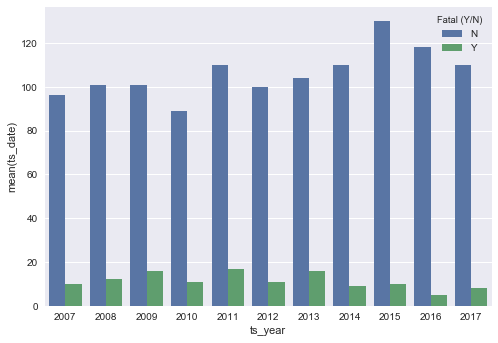

In [148]:
sns_plot = sns.barplot(x='ts_year', y='ts_date', hue = 'Fatal (Y/N)', data = ann_fatal)
sns_plot.figure.savefig("ann_fatal.png")

In [149]:
ann_type = pd.DataFrame(annual_graph_df.groupby(['Type', 'Fatal (Y/N)', 'ts_year'])['Case Number'].count())

In [150]:
ann_type=ann_type.reset_index()

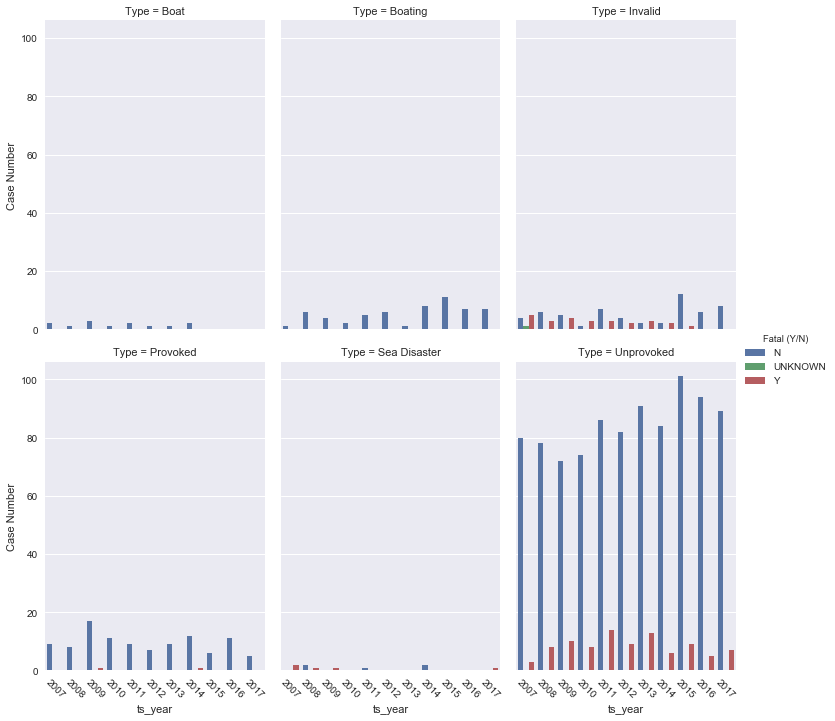

In [151]:
sns_plot = sns.factorplot(x='ts_year', y='Case Number',col_wrap=3, hue = 'Fatal (Y/N)', col = 'Type', data = ann_type, kind= "bar", 
               size=5, aspect=.7)
sns_plot.set_xticklabels(rotation=-45)
sns_plot.savefig("ann_type.png")

In [152]:
ann_country = annual_graph_df[['ts_date', 'ts_year','Country', 'Fatal (Y/N)']].groupby(['ts_year' ,'Country', 'Fatal (Y/N)']).count().reset_index()

In [153]:
ann_country = ann_country.reset_index()

In [154]:
ann_country

,index,ts_year,Country,Fatal (Y/N),ts_date
0,0,2007,AUSTRALIA,N,16
1,1,2007,AUSTRALIA,Y,2
2,2,2007,BAHAMAS,N,3
3,3,2007,BRAZIL,N,1
4,4,2007,BRITISH VIRGIN ISLANDS,Y,1
5,5,2007,COSTA RICA,Y,1
6,6,2007,ECUADOR,N,1
7,7,2007,EGYPT,N,1
8,8,2007,ENGLAND,N,1
9,9,2007,NEW CALEDONIA,N,2


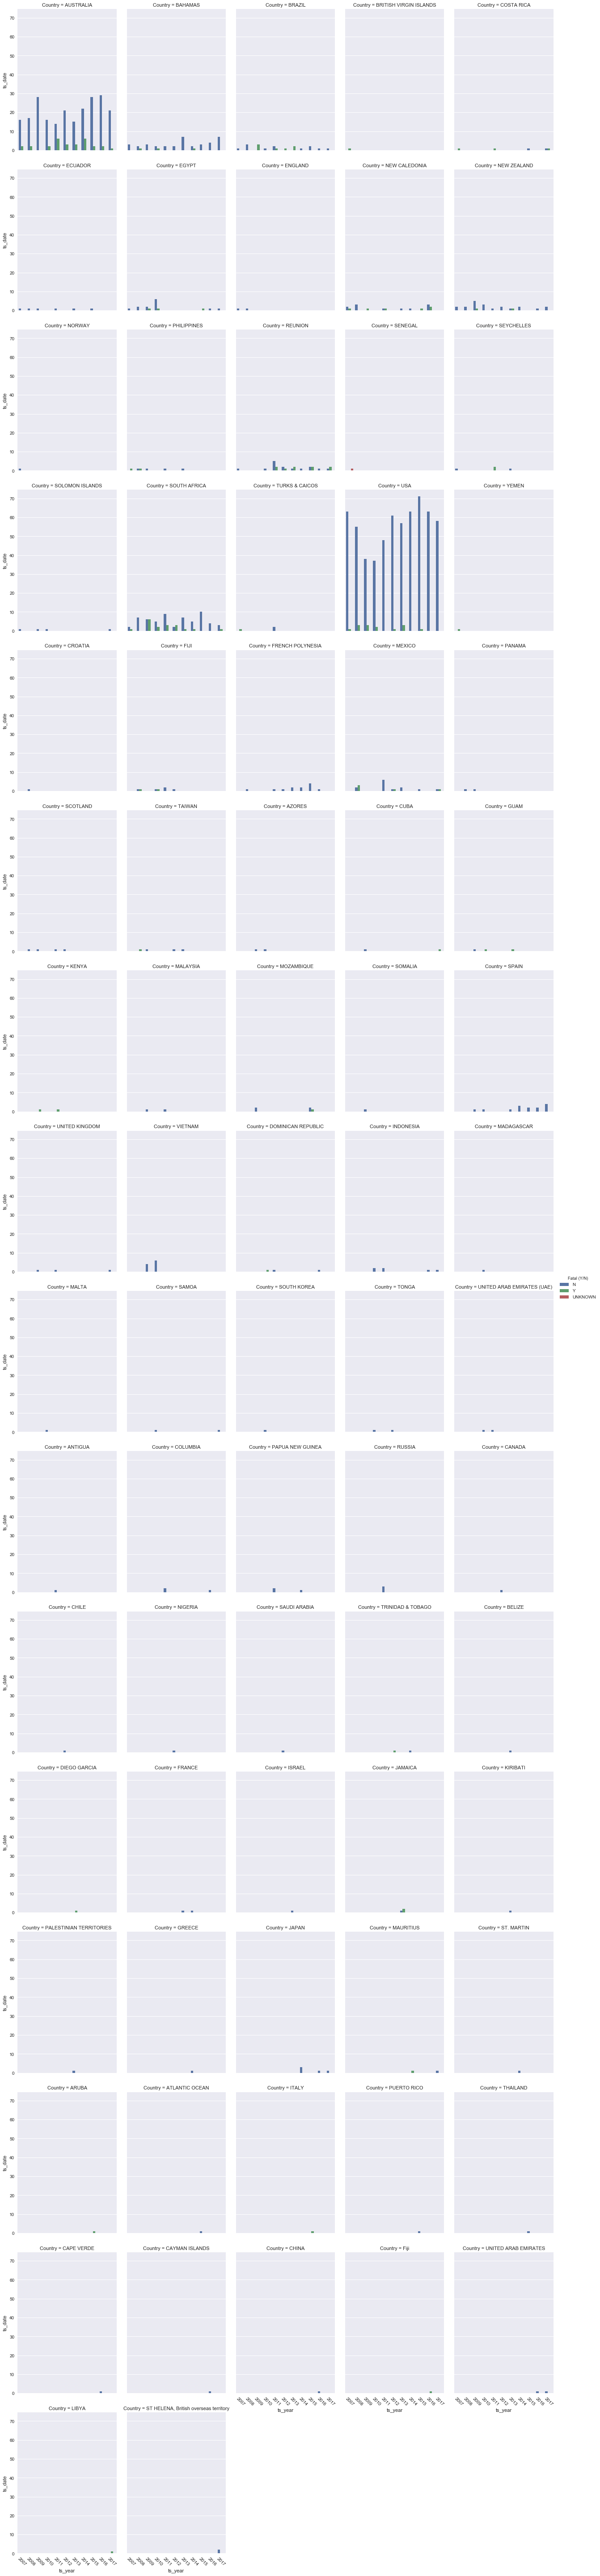

In [155]:
sns_plot = sns.factorplot(x='ts_year', y='ts_date',col_wrap=5, hue = 'Fatal (Y/N)', col = 'Country', data = ann_country, kind= "bar", 
               size=5, aspect=.7)
sns_plot.set_xticklabels(rotation=-45)
sns_plot.savefig("ann_count.png")

#### Ok WHO gets attacked? Men or women?

In [156]:
new_df.columns

Index(['Unnamed: 0', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'ts_year', 'ts_month', 'ts_day', 'ts_time', 'ts_date'],
      dtype='object')

In [158]:
new_df["Sex "] = new_df["Sex "].astype(str)

In [159]:
new_df["Sex "]

0         M
1         F
2       nan
3         M
4         F
5         M
6         M
7         M
8         M
9         M
10        M
11        M
12        M
13        F
14        F
15        M
16        M
17        F
18        M
19        M
20        M
21        M
22        M
23        M
24        M
25        M
26        M
27        M
28      nan
29        M
       ... 
1312      F
1313      M
1314    nan
1315      F
1316      F
1317      M
1318      M
1319    nan
1320      M
1321      M
1322      M
1323      M
1324    nan
1325      M
1326      F
1327      M
1328      F
1329      M
1330      M
1331      M
1332      M
1333      M
1334      M
1335    nan
1336      M
1337      M
1338      M
1339      M
1340      M
1341      M
Name: Sex , Length: 1342, dtype: object

In [164]:
sex = []
for x in new_df["Sex "]:
    try:
        if ("M" not in x) & ("F" not in x):
            sex.append(None)
        elif "M" in x:
            sex.append("M")
        elif "F" in x:
            sex.append("F")
    except:
        sex.append(None)

In [166]:
new_df["Sex "] = sex

In [177]:
new_df.columns

Index(['Unnamed: 0', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'ts_year', 'ts_month', 'ts_day', 'ts_time', 'ts_date'],
      dtype='object')

In [178]:
new_df = new_df.drop('Unnamed: 0', axis =1)

In [179]:
new_df.to_csv('../assets/02_df.csv')

In [172]:
model_df = new_df.drop(['Unnamed: 0', "Case Number", "Date", "Year", "Name", "Species ", "pdf", "href formula", 'href', 'Time', 'Injury', 'Age', 'Sex '], axis =1)

In [175]:
model_df = model_df.drop(['Area', 'Location', 'Investigator or Source', 'ts_time'], axis =1)

In [176]:
model_df

,Type,Country,Activity,Fatal (Y/N),ts_year,ts_month,ts_day,ts_date
0,Unprovoked,COSTA RICA,Scuba Diving,N,2017,11,30,2017-11-30
1,Unprovoked,COSTA RICA,Scuba diving,Y,2017,11,30,2017-11-30
2,Sea Disaster,LIBYA,2 boats capsized,Y,2017,11,25,2017-11-25
3,Unprovoked,USA,Spearfishing,N,2017,11,24,2017-11-24
4,Unprovoked,USA,Surfing,N,2017,11,18,2017-11-18
5,Unprovoked,NaN,Surfing,N,2017,11,13,2017-11-13
6,Unprovoked,AUSTRALIA,Surfing,N,2017,11,13,2017-11-13
7,Unprovoked,CUBA,Night bathing,Y,2017,11,4,2017-11-04
8,Unprovoked,AUSTRALIA,Snorkeling,N,2017,10,31,2017-10-31
9,Unprovoked,AUSTRALIA,Surfing,N,2017,10,28,2017-10-28


### Executive Summary<br>
This is filthy data! This will be a fun project. There are most attacks in the United States because of how many recreational beaches there are. Will pull in world population data for my final model; or perhaps hone in on just the US. Will be doing MCMC to try to predict the number of shark attacks in the coming year.